
--- First 5 Rows ---
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Model Coefficients (β):
 [[ 4.14209874e+05]
 [-1.14202987e+01]
 [ 3.48975597e-02]
 [-6.95362396e+02]
 [-4.16122853e+03]
 [ 1.95538445e+04]
 [ 5.13364293e+01]
 [ 1.41421954e+03]
 [ 2.03221671e+04]
 [-1.78026012e+04]
 [ 2.92501682e+04]
 [-2.19814197e+03]
 [-1.92890574e+03]
 [ 5.85716961e+02]]

Training MSE: 75698635195.4425
Training R²: 0.008851950897529548

5-Fold Cross Validation Results:
MSE: [77437919

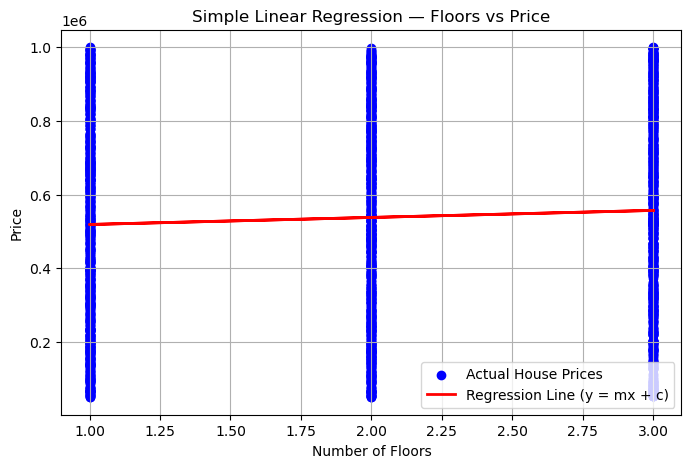

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ------------------ LOAD DATA ------------------
data = pd.read_csv("House Price Prediction Dataset.csv")

print("\n--- First 5 Rows ---")
print(data.head())

# ------------------ DROP ROWS WITH MISSING VALUES ------------------
data = data.dropna()

# ------------------ ONE-HOT ENCODE CATEGORICAL FEATURE ------------------
data_encoded = pd.get_dummies(data, drop_first=True).astype(float)

# ------------------ FEATURES & TARGET ------------------
X = data_encoded.drop('Price', axis=1).values
y = data_encoded['Price'].values.reshape(-1,1)

# ------------------ ADD BIAS COLUMN ------------------
X_b = np.hstack([np.ones((X.shape[0],1)), X])

# ------------------ LINEAR REGRESSION FROM SCRATCH ------------------
beta = np.linalg.pinv(X_b) @ y
print("\nModel Coefficients (β):\n", beta)

# Prediction Function
def predict(X_input):
    X_input = np.hstack([np.ones((X_input.shape[0],1)), X_input])
    return X_input @ beta

# ------------------ TRAIN PERFORMANCE ------------------
y_pred = predict(X)
train_mse = np.mean((y - y_pred)**2)
train_r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print("\nTraining MSE:", train_mse)
print("Training R²:", train_r2)

# ------------------ K-FOLD CROSS VALIDATION ------------------
kf = KFold(n_splits=5, shuffle=True, random_state=1)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test_b = np.hstack([np.ones((X_test.shape[0],1)), X_test])

    beta_fold = np.linalg.pinv(X_train_b) @ y_train
    y_pred_fold = X_test_b @ beta_fold

    mse_scores.append(mean_squared_error(y_test, y_pred_fold))
    r2_scores.append(r2_score(y_test, y_pred_fold))

print("\n5-Fold Cross Validation Results:")
print("MSE:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("\nR²:", r2_scores)
print("Average R²:", np.mean(r2_scores))

# ------------------ SAMPLE PREDICTION ------------------
sample = pd.DataFrame({
    'Area': [200],
    'Bedrooms': [3],
    'Location': ['Downtown']
})

sample_encoded = pd.get_dummies(sample, columns=['Location'])
sample_encoded = sample_encoded.reindex(columns=data_encoded.drop('Price',axis=1).columns, fill_value=0)

predicted_price = predict(sample_encoded.values)
print("\nPredicted House Price:", predicted_price[0][0])

# ---------------- SIMPLE LINEAR REGRESSION — Floors vs Price ----------------
x = data_encoded["Floors"].values
y = data_encoded["Price"].values

# Mean values
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute slope (m) and intercept (c)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

m = numerator / denominator
c = y_mean - m * x_mean

print("\nSlope (m):", m)
print("Intercept (c):", c)

# Predict price for drawing straight regression line
y_line = m * x + c

# ---------------- PLOT ----------------
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Actual House Prices")
plt.plot(x, y_line, color="red", linewidth=2, label="Regression Line (y = mx + c)")
plt.xlabel("Number of Floors")
plt.ylabel("Price")
plt.title("Simple Linear Regression — Floors vs Price")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Calculate correlation with Price
correlation = data_encoded.corr()['Price'].sort_values(ascending=False)
print("\n--- Feature Correlation with Price ---")
print(correlation)



--- Feature Correlation with Price ---
Price                1.000000
Floors               0.055890
Condition_Fair       0.049218
Location_Suburban    0.040303
YearBuilt            0.004845
Garage_Yes           0.002842
Location_Rural       0.001890
Area                 0.001542
Bedrooms            -0.003471
Bathrooms           -0.015737
Condition_Good      -0.017179
Condition_Poor      -0.018437
Id                  -0.025643
Location_Urban      -0.038312
Name: Price, dtype: float64
